# Linear Regression

<span>Below is an example of a regression problem using linear regression to predict house prices from a dataset provided on Kaggle. The dataset can be found at the link below. Note that I have tried to reduce the amount of regularization found in sklearn's implementation of the model. As well as attempting to compare and contrast the performance of both statsmodel's linear regression model and sklearn's linear regression model. I try to avoid a lot of feature engineering here, as this notebook is just an example of the models</span>.

## Import libraries 

In [2]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

# Import modules
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import numpy as np
import pandas as pd 
import seaborn as sns
import statsmodels.api as sm
import warnings

from sklearn.datasets import load_diabetes
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from statsmodels.regression import linear_model

# Import models
from sklearn.linear_model import LinearRegression


# Set pandas options
pd.set_option('max_columns',1000)
pd.set_option('max_rows',100)

# Set plotting options
mpl.rcParams['figure.figsize'] = (9.0, 6.0)

# Set warning options
warnings.filterwarnings('ignore');

### Import Data

In [3]:
# Import diabetet data
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# Conduct a train-test-split on the data
train_x, test_x, train_y, test_y = train_test_split(X,y, test_size=0.25)

# View the training dataframe
pd.DataFrame(train_x, columns=diabetes['feature_names']).head(5)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,-0.052738,-0.044642,0.054152,-0.026328,-0.055231,-0.033881,-0.013948,-0.039493,-0.074089,-0.059067
1,-0.027310,0.050680,-0.015906,-0.029771,0.003935,-0.000688,0.041277,-0.039493,-0.023645,0.011349
2,0.001751,-0.044642,-0.046085,-0.033214,-0.073119,-0.081480,0.044958,-0.069383,-0.061177,-0.079778
3,-0.012780,-0.044642,0.060618,0.052858,0.047965,0.029375,-0.017629,0.034309,0.070211,0.007207
4,-0.005515,0.050680,-0.041774,-0.043542,-0.079998,-0.076156,-0.032356,-0.039493,0.010226,-0.009362


### Target Outcomes

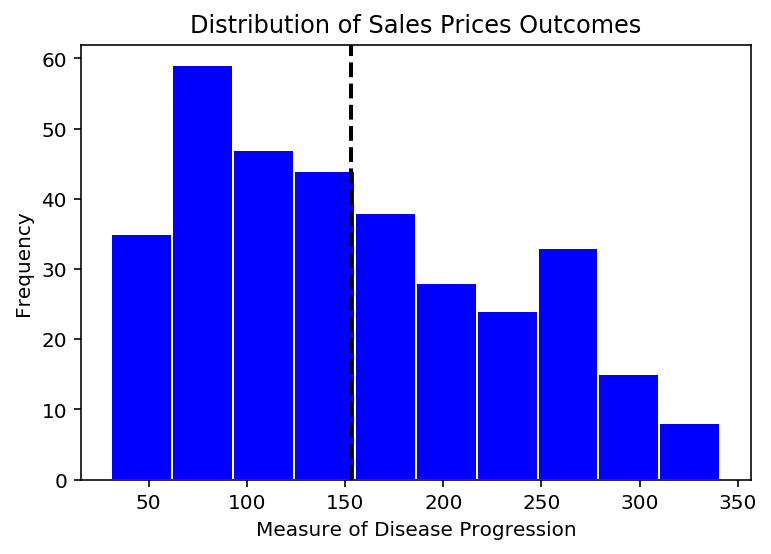

In [19]:
# Plot a histogram of all the home price valuse
pd.Series(train_y).plot.hist(grid=False, color='blue', edgecolor='w',)
plt.title('Distribution of Sales Prices Outcomes')
plt.ylabel('Frequency')
plt.xlabel('Measure of Disease Progression')
plt.axvline(pd.Series(train_y).mean(), color='black', linestyle='dashed', linewidth=2);

### Fit model

In [14]:
model = LinearRegression()
model.fit(train_x, train_y);

### Model Evaluation

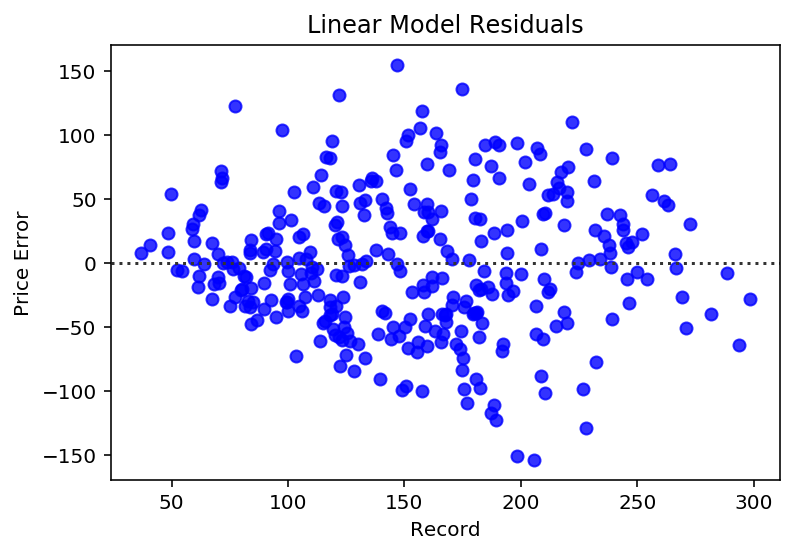

In [25]:
# Plotting residuals from our model
pred_y = model.predict(train_x)
sns.residplot(pred_y, train_y, color='blue')
plt.title('Linear Model Residuals')
plt.ylabel('Price Error')
plt.xlabel('Record');

#### Coefficient Magnitude

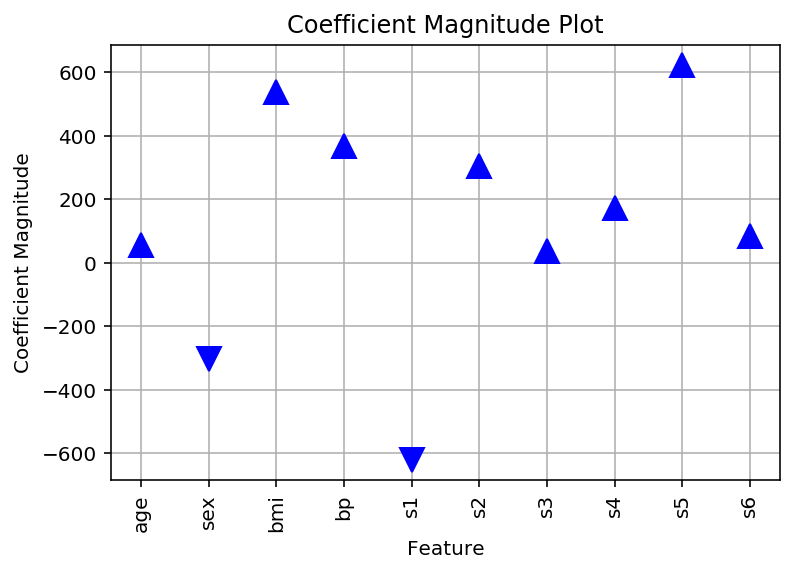

In [26]:
# Plot our coefficient magnitude with variating markes
markers = ['^' if i >=0 else 'v' for i in model.coef_.T]
for i, j in enumerate(markers):
    plt.plot(i,model.coef_[i], marker=markers[i],color='blue', linewidth=0, markersize=12)
    plt.xticks(range(diabetes.data.shape[1]), diabetes.feature_names, rotation=90);
plt.title('Coefficient Magnitude Plot')
plt.ylabel('Coefficient Magnitude')
plt.xlabel('Feature')
plt.grid();

### Statistics

In [28]:
# Add constant to trainin data
train_x = sm.add_constant(train_x)

# Conduct linear regression via stats model's API
myregression = linear_model.OLS(train_y, train_x).fit()
myregression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     36.43
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           3.66e-47
Time:                        15:55:10   Log-Likelihood:                -1785.0
No. Observations:                 331   AIC:                             3592.
Df Residuals:                     320   BIC:                             3634.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.7561      2.988     51.123      0.000     146.878     158.635
x1            55.8342     69.326      0.805      0.421     -80.558     192.226
x2          -302.6848     70.998     -4.263      0.000    -442.367    -163.003
x3           536.0974     76.789      6.981      0.000     385.022     687.173
x4           367.5742     75.296      4.882      0.000     219.437     515.712
x5          -621.6804    513.405     -1.211      0.227   -1631.756     388.395
x6           305.1237    420.292      0.726      0.468    -521.760    1132.008
x7            37.4875    256.898      0.146      0.884    -467.936     542.911
x8           172.5181    190.962      0.903      0.367    -203.181     548.218
x9           623.5361    200.120      3.116      0.002     229.819    1017.253
x10           83.8492     75.811      1.106      0.270     -65.302     233.000
==============================================================================
Omnibus:                        0.339   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.844   Jarque-Bera (JB):                0.417
Skew:                           0.073   Prob(JB):                        0.812
Kurtosis:                       2.905   Cond. No.                         242.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Author: Kam Bansal